### Predict weather loan would be approved or Not


Context


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Importing Libraries

In [2]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

In [3]:
df = pd.read_csv("C:/Users/Todays Soutions/Documents/Data_Science/DATA/Loan_Data.csv")
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
## Dependent is set as object Dtype

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Count the unique values

In [8]:
def count_value(*, data):
    for col in df:
        print(f"{col}:\n {data[col].value_counts()}\n")
        print("=======================")

In [9]:
count = count_value(data=df)
count

Loan_ID:
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
LP002315    1
LP002317    1
LP002318    1
LP002319    1
LP002332    1
LP002236    1
LP002335    1
LP002337    1
LP002341    1
LP002342    1
LP002345    1
LP002347    1
LP002348    1
LP002301    1
LP002300    1
LP002297    1
LP002296    1
LP002239    1
LP002243    1
LP002244    1
LP002250    1
LP002255    1
LP002262    1
LP002263    1
LP002265    1
LP002266    1
LP002272    1
LP002277    1
LP002281    1
LP002284    1
LP002287    1
LP002288    1
LP002357    1
LP002361    1
LP002362    1
LP002418    1
LP002424    1
LP002429    1
LP002434    1
LP002435    1
LP002443    1
LP002444    1
LP002446    1
LP002447    1
LP002448    1
LP002449    1
LP002453    1
LP002455    1
LP002459    1
LP002467    1
LP002472    1
LP002422    1
LP002409    1
LP002364    1
LP002408    1
LP002366    1
LP002367    1
LP002368    1
LP002369    1
LP002370    1
LP002377    1
LP002379    1
LP002386    1
LP002387    1
LP002390    1
LP002393  

In [10]:
def count_value(*, data):
    for col in df:
        print(f"{col}:\n{data[col].value_counts()}\n")
        print("==============================================================")

In [11]:
count = count_value(data=df)
count

Loan_ID:
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
LP002315    1
LP002317    1
LP002318    1
LP002319    1
LP002332    1
LP002236    1
LP002335    1
LP002337    1
LP002341    1
LP002342    1
LP002345    1
LP002347    1
LP002348    1
LP002301    1
LP002300    1
LP002297    1
LP002296    1
LP002239    1
LP002243    1
LP002244    1
LP002250    1
LP002255    1
LP002262    1
LP002263    1
LP002265    1
LP002266    1
LP002272    1
LP002277    1
LP002281    1
LP002284    1
LP002287    1
LP002288    1
LP002357    1
LP002361    1
LP002362    1
LP002418    1
LP002424    1
LP002429    1
LP002434    1
LP002435    1
LP002443    1
LP002444    1
LP002446    1
LP002447    1
LP002448    1
LP002449    1
LP002453    1
LP002455    1
LP002459    1
LP002467    1
LP002472    1
LP002422    1
LP002409    1
LP002364    1
LP002408    1
LP002366    1
LP002367    1
LP002368    1
LP002369    1
LP002370    1
LP002377    1
LP002379    1
LP002386    1
LP002387    1
LP002390    1
LP002393   

TO-DOS

* Drop Loan-ID
* fill in the missing columns
* I might discretize the Applicant Income
* discretize the CoapplicantIncome
* Loan_Amount_Term- This is Term of loan in months
* Graph
* Group columns based on loan_status




In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Drop Loan-ID

In [13]:
data = df[
    [
        "Gender",
        "Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "ApplicantIncome",
        "CoapplicantIncome",
        "LoanAmount",
        "Loan_Amount_Term",
        "Credit_History",
        "Property_Area",
        "Loan_Status",
    ]
]

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### fill in the missing columns

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data.loc[data["LoanAmount"].isnull(), "LoanAmount"] = data["LoanAmount"].mode()[0]

In [19]:
# Using mode for Object data type
data.loc[data["Gender"].isnull(), "Gender"] = data["Gender"].mode()[0]
data.loc[data["Married"].isnull(), "Married"] = data["Married"].mode()[0]
data.loc[data["Dependents"].isnull(), "Dependents"] = data["Dependents"].mode()[0]
data.loc[data["Self_Employed"].isnull(), "Self_Employed"] = data[
    "Self_Employed"
].mode()[0]
data.loc[data["Credit_History"].isnull(), "Credit_History"] = data[
    "Credit_History"
].mode()[0]


# USing mean for numerica data type
data.loc[data["LoanAmount"].isnull(), "LoanAmount"] = data["LoanAmount"].mean()
data.loc[data["Loan_Amount_Term"].isnull(), "Loan_Amount_Term"] = data[
    "Loan_Amount_Term"
].mean()

In [20]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Graphical illustration of relationship between Credit History and Loan Status

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0             110  415  525
All             192  422  614


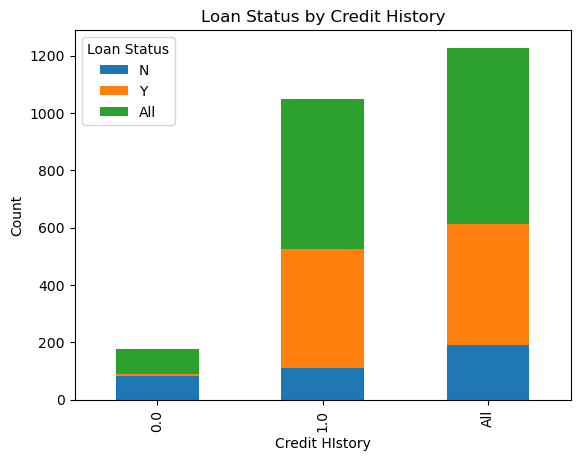

In [21]:
cross_tab = pd.crosstab(data["Credit_History"], data["Loan_Status"], margins=True)
print(cross_tab)
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Credit HIstory")
plt.ylabel("Count")
plt.title("Loan Status by Credit History")
plt.legend(title="Loan Status")

#### Graphical illustration of relationship between Gender and Loan Status

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         155  347  502
All          192  422  614


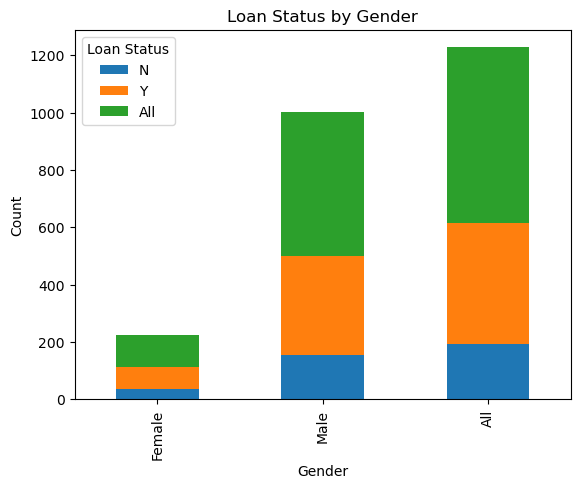

In [22]:
cross_tab = pd.crosstab(data["Gender"], data["Loan_Status"], margins=True)
print(cross_tab)
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status by Gender")
plt.legend(title="Loan Status")

Text(0.5, 1.0, 'Loan status by Property_Area')

<Figure size 1400x1000 with 0 Axes>

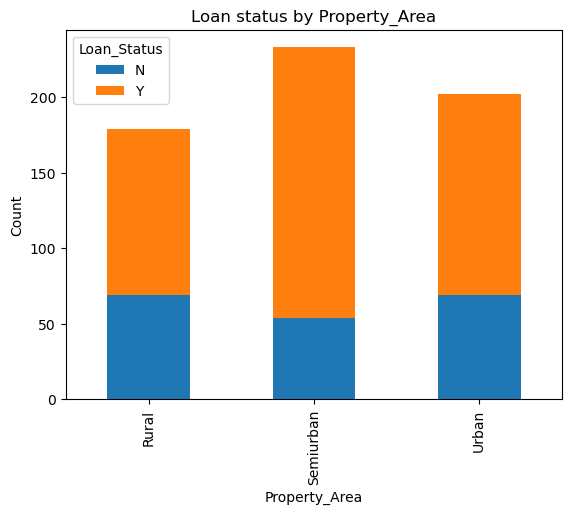

In [23]:
# Grouping the data by 'gender' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["Property_Area", "Loan_Status"]).size().unstack()
# .unstack() as a way to convert a vertically organized GroupBy result into a horizontally organized tabular format, making it easier to work with and analyze the data.
# .size(): This calculates the size or count of each group within the GroupBy object. It counts the number of occurrences of each combination of "Property_Area" and "Loan_Status".


# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Property_Area")
plt.ylabel("Count")
plt.title("Loan status by Property_Area")

Text(0.5, 1.0, 'Loan status by Self_Employed')

<Figure size 1400x1000 with 0 Axes>

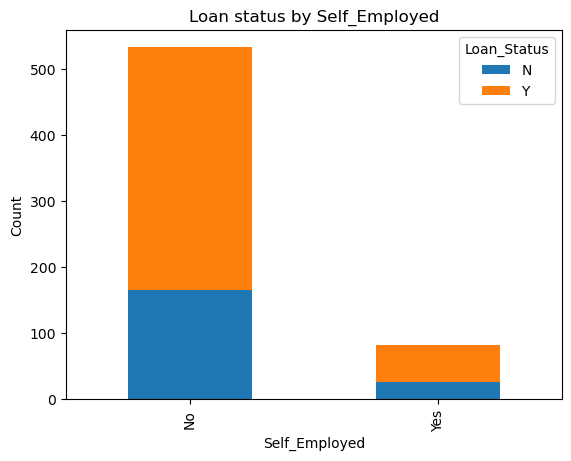

In [24]:
# Grouping the data by 'gender' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["Self_Employed", "Loan_Status"]).size().unstack()
# .unstack() as a way to convert a vertically organized GroupBy result into a horizontally organized tabular format, making it easier to work with and analyze the data.
# .size(): This calculates the size or count of each group within the GroupBy object. It counts the number of occurrences of each combination of "Property_Area" and "Loan_Status".
# Plot the bar graph


# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.title("Loan status by Self_Employed")

Text(0.5, 1.0, 'Loan status by Self_Employed')

<Figure size 1400x1000 with 0 Axes>

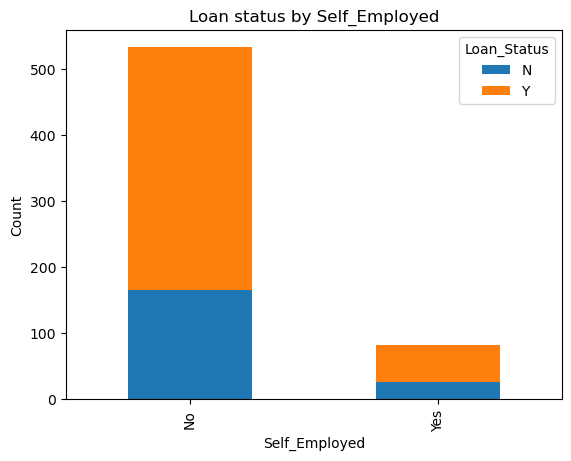

In [25]:
# Grouping the data by 'gender' and 'loan_default' and calculating the counts for bar graph
grouped_data = data.groupby(["Self_Employed", "Loan_Status"]).size().unstack()
# .unstack() as a way to convert a vertically organized GroupBy result into a horizontally organized tabular format, making it easier to work with and analyze the data.
# .size(): This calculates the size or count of each group within the GroupBy object. It counts the number of occurrences of each combination of "Property_Area" and "Loan_Status".


# Plot the bar graph
plt.figure(figsize=(14, 10))  # Optional: Adjust the figure size
grouped_data.plot(kind="bar", stacked=True)

# Set the labels and title
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.title("Loan status by Self_Employed")

In [26]:
grouped_data = data.groupby(["Property_Area", "Loan_Status"]).size().unstack()
grouped_data

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [27]:
grouped_data = data.groupby(["Property_Area", "Loan_Status"]).size()
grouped_data

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


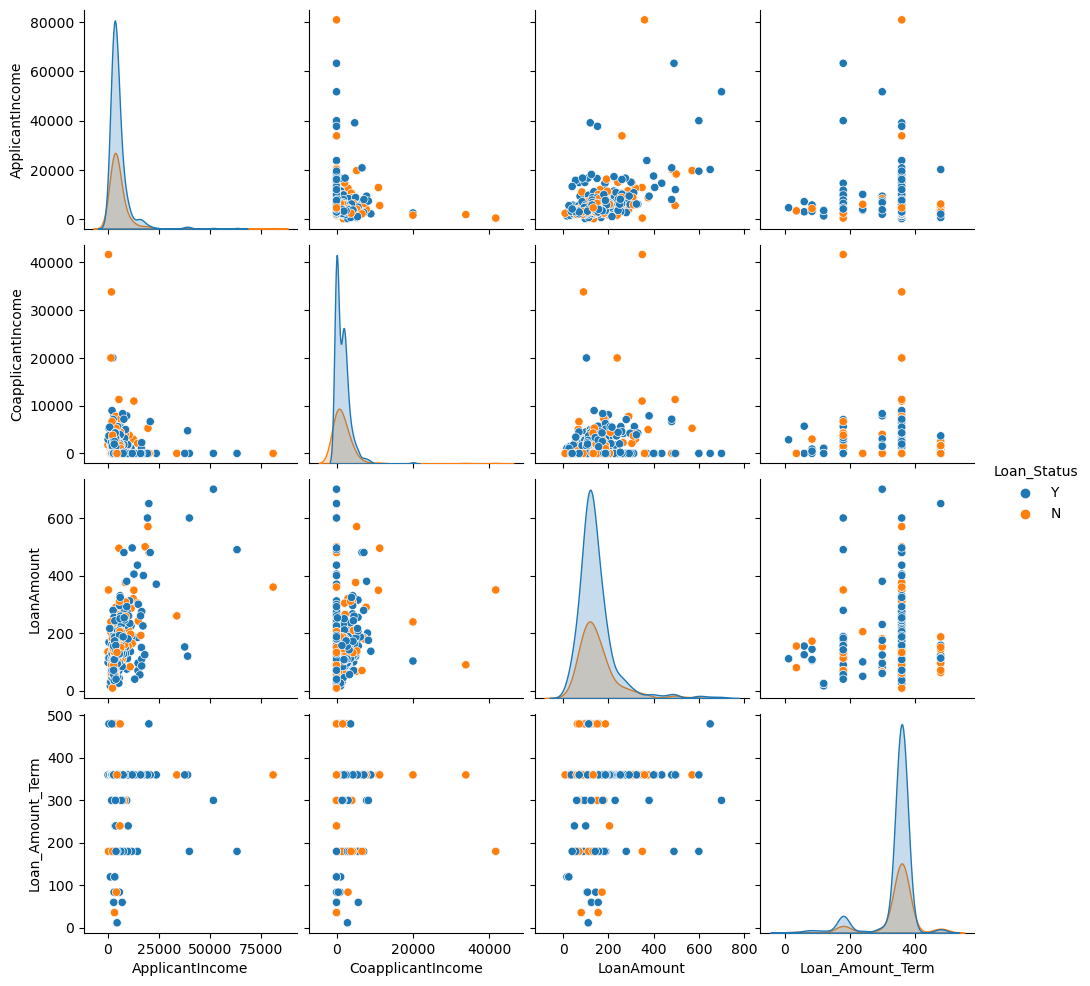

In [29]:
sns.pairplot(
    df,
    vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"],
    hue="Loan_Status",
)

#### Relationship between variables

<Axes: title={'center': 'Applicant_Income vs Loan_Amount (Loan amount in thousands)'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

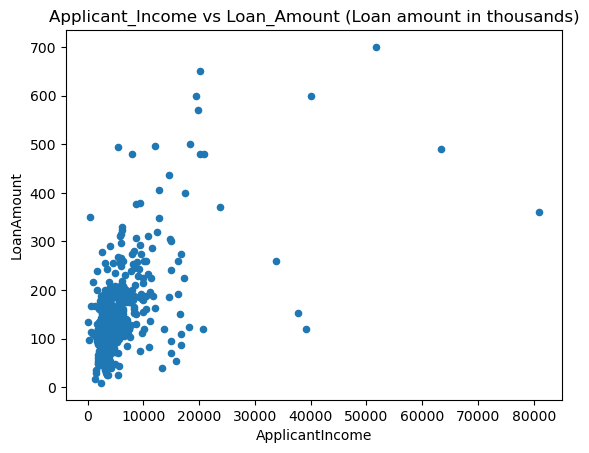

In [30]:
data.plot(
    kind="scatter",
    x="ApplicantIncome",
    y="LoanAmount",
    title="Applicant_Income vs Loan_Amount (Loan amount in thousands)",
)

Text(0.5, 1.0, 'Loan Amount (Loan amount in thousands)')

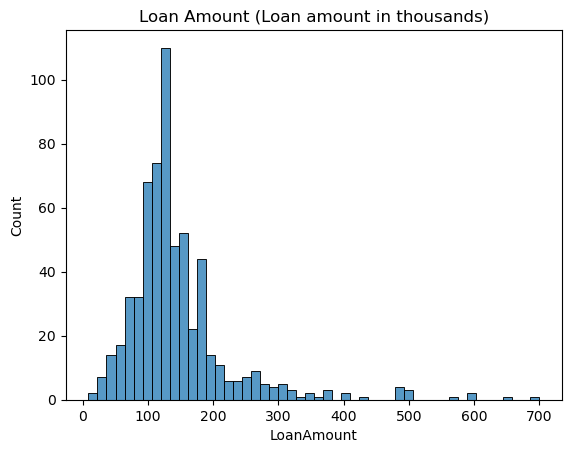

In [31]:
sns.histplot(data["LoanAmount"], bins=50)
plt.title("Loan Amount (Loan amount in thousands)")

#### Correlation 

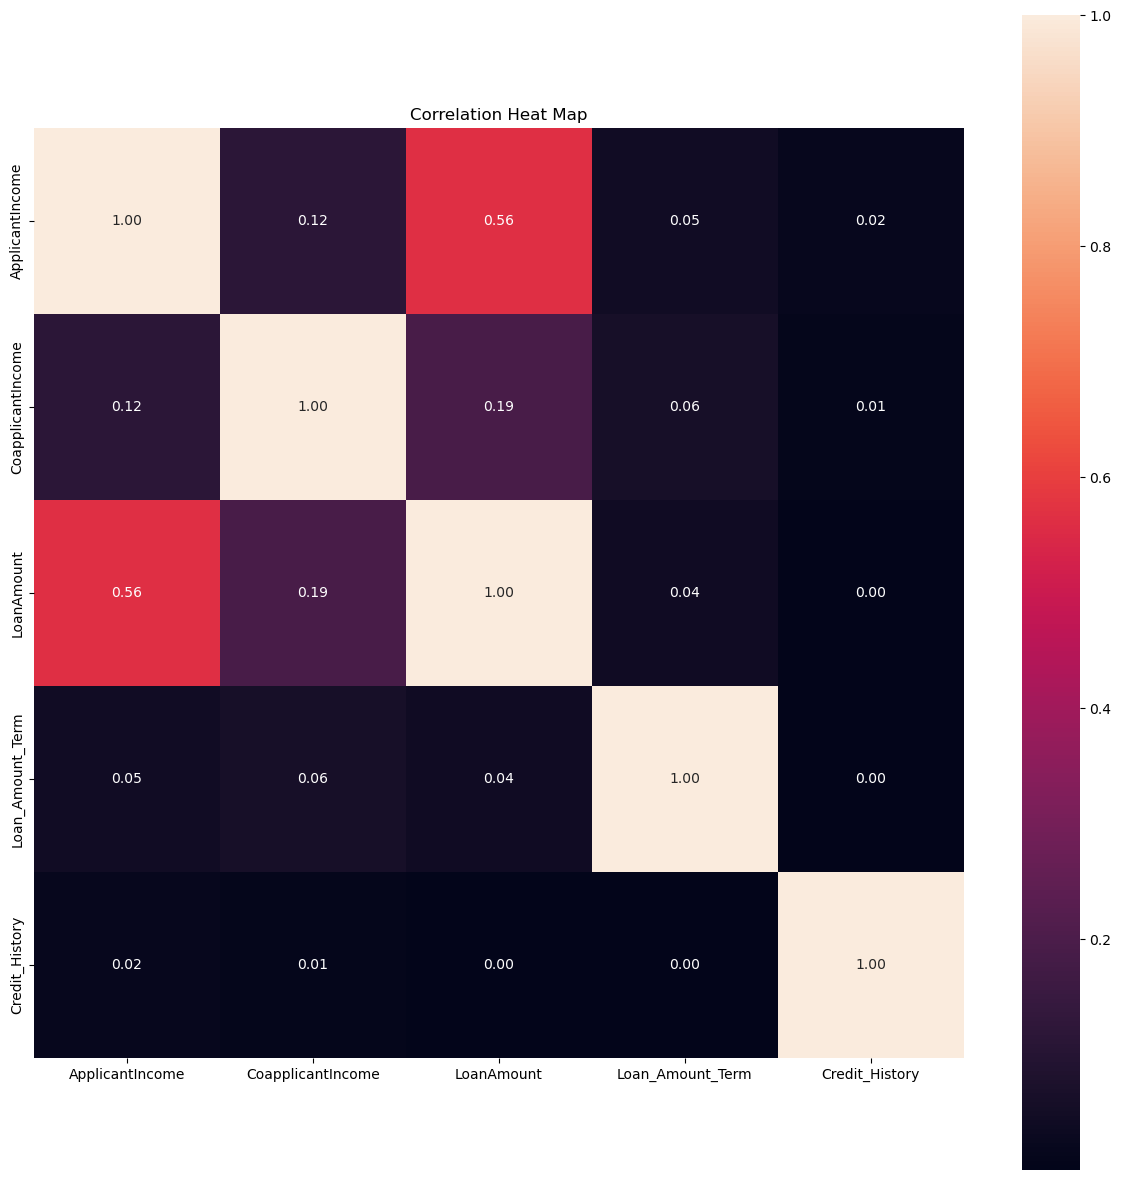

In [32]:
# Check for correlation
corr_matrix = data.select_dtypes(exclude=["O"]).corr().abs()

plt.figure(figsize=(15, 15))
sns.heatmap(data=corr_matrix, annot=True, square=True, fmt=".2f")
plt.title("Correlation Heat Map")
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Change Loan Statis to 1 and 0

In [34]:
print(data["Loan_Status"].sample(10))

486    N
316    Y
85     Y
48     N
315    Y
434    Y
372    Y
268    N
595    Y
471    N
Name: Loan_Status, dtype: object


In [36]:
data["Loan_Status"] = data["Loan_Status"].replace(["Y", "N"], [1, 0])
data["Loan_Status"].value_counts()

C:\Users\Todays Soutions\AppData\Local\Temp\ipykernel_28932\1604430264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Loan_Status"] = data["Loan_Status"].replace(["Y", "N"], [1, 0])


1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
### Init the constant

In [37]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Loan_Status"

#### Spliting the data into train and test data

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=TARGET)

# Target variable (Vector)
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((491, 11), (123, 11))

In [39]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
579,Male,No,0,Graduate,No,3182,2917.0,161.0,360.0,1.0,Urban
199,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban
309,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,1.0,Rural
589,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban


In [40]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### Converting the objects to numbers and scaling the number 

In [50]:
from sklearn.compose import ColumnTransformer
Cfrom sklearn.preprocessing import OneHotEncoder, MinMaxScaler

vars_to_scale = [
    "ApplicantIncome",
    "CoapplicantIncome",
    "LoanAmount",
    "Loan_Amount_Term",
    "Credit_History",
]

vars_to_enc = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area",
]

# ====OHE====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ====Scaler=====
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Gender', 'Married', 'Dependents',
                                  'Education', 'Self_Employed',
                                  'Property_Area']),
                                ('scaler', MinMaxScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History'])])

### Gradient Boosting Classifier

In [51]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
import joblib

# Init
gb_classifier = GradientBoostingClassifier(random_state=123)

pipe_class = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model ======
        ("gb_classifier", gb_classifier),
    ]
)
pipe_class

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('gb_classifier',
                 GradientBoostingClassifier(random_state=123))])

In [52]:
# Fit
pipe_class.fit(X_train, y_train)

# Make predictions
y_pred = pipe_class.predict(X_test)

# Probability of Surviving
y_prob = pipe_class.predict_proba(X_test)[:, 1]
y_prob

array([0.56356277, 0.88905419, 0.18126112, 0.81023776, 0.02757126,
       0.9228378 , 0.81658488, 0.80809899, 0.78606622, 0.89716569,
       0.02320025, 0.65507601, 0.65766897, 0.93774571, 0.77814724,
       0.87755175, 0.06901628, 0.90621441, 0.76489451, 0.03245766,
       0.88939116, 0.85551386, 0.75019294, 0.89732931, 0.69734947,
       0.89380729, 0.89284665, 0.83775427, 0.53132584, 0.04710735,
       0.93305977, 0.06007166, 0.07756142, 0.94009741, 0.88220541,
       0.76076651, 0.06208926, 0.91335197, 0.79060664, 0.76199287,
       0.89510539, 0.90159444, 0.89933621, 0.89347963, 0.84969394,
       0.88145635, 0.02522653, 0.87359619, 0.87852506, 0.57467249,
       0.94768892, 0.95393837, 0.71619698, 0.77046375, 0.00867852,
       0.90248419, 0.89845156, 0.33378896, 0.84402484, 0.91955759,
       0.73626504, 0.07146208, 0.68702616, 0.91542063, 0.65142533,
       0.79723981, 0.82483512, 0.88815803, 0.04766188, 0.79692901,
       0.91295476, 0.88291695, 0.84096507, 0.87217769, 0.14971

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

Accuracy: 0.7560975609756098
Precision: 0.7628865979381443
Recall: 0.9135802469135802
F1 Score: 0.8314606741573032
AUC-ROC Score: 0.6829805996472662


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a Logistic regression model
logit = LogisticRegression()

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer ====
        ("col_transformer", col_transformer),
        # =====log model =========
        ("logit", logit),
    ]
)
pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('logit', LogisticRegression())])

In [55]:
pipe_logit.fit(X_train, y_train)

y_pred_lg = pipe_logit.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

Accuracy: 0.7804878048780488
Precision: 0.7596153846153846
Recall: 0.9753086419753086
F1 Score: 0.8540540540540541
AUC-ROC Score: 0.6900352733686067


### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

pipe_tree = Pipeline(
    steps=[
        # ==== Columns Transformer ====
        ("col_transformer", col_transformer),
        # ====log model =========
        ("dec_tree", dec_tree),
    ]
)
pipe_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('dec_tree', DecisionTreeClassifier())])

In [60]:
pipe_tree.fit(X_train, y_train)

y_pred_tr = pipe_tree.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred_tr)
precision = precision_score(y_test, y_pred_tr)
recall = recall_score(y_test, y_pred_tr)
f1 = f1_score(y_test, y_pred_tr)
roc_auc = roc_auc_score(y_test, y_pred_tr)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

Accuracy: 0.7317073170731707
Precision: 0.7857142857142857
Recall: 0.8148148148148148
F1 Score: 0.7999999999999999
AUC-ROC Score: 0.693121693121693


In [ ]:
pipe_logit.fit(X_train, y_train)

y_pred_lg = pipe_logit.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg)
recall = recall_score(y_test, y_pred_lg)
f1 = f1_score(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc_auc}")

### SAVE THE MODEL

In [62]:
import joblib

# Specify the file path as a string
file_path = (
    r"C:\Users\Todays Soutions\Documents\Data_Science\ASSIGNMENT\API\pipe_logit.pkl"
)

# Save the model to the specified file path
joblib.dump(pipe_logit, file_path)

['C:\\Users\\Todays Soutions\\Documents\\Data_Science\\ASSIGNMENT\\API\\pipe_logit.pkl']